In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
# special need for Google Colab
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks/Data")
!ls

In [40]:
# Define image size and number of classes
img_height, img_width = 299, 299
num_classes = 2

# Define data directories for training and testing data
train_dir = 'Train/'
test_dir = 'Test/'

# Define image augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Define image augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
# Load training and testing data
batch_size = 128

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='training')

val_data = train_datagen.flow_from_directory(train_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             subset='validation')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=batch_size,
                                             shuffle=False,
                                             class_mode='categorical')

Found 960 images belonging to 2 classes.
Found 238 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
# Load MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Add top layers to the MobileNetV2 model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final mobileNetV2 model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data,
                    epochs=50,
                    validation_data=val_data)

In [ ]:
# Test the model
labels = test_data.labels
predictions = model.predict(test_data)
pred_labels = predictions.argmax(axis=-1)

In [ ]:
# Print test results on different items
print("(a) - Recall:", np.sum(pred_labels[70:87] == labels[70:87]), "/ 17\tPf:", 
      np.sum([p[0] for p in predictions[70:87]])/17, "\tPu:", np.sum([p[1] for p in predictions[70:87]])/17)
print("(b) - Recall:", np.sum(pred_labels[87:99] == labels[87:99]), "/ 12\tPf:", 
      np.sum([p[0] for p in predictions[87:99]])/12, "Pu:", np.sum([p[1] for p in predictions[87:99]])/12)
print("(c) - Recall:", np.sum(pred_labels[99:122] == labels[99:122]), "/ 23\tPf:", 
      np.sum([p[0] for p in predictions[99:122]])/23, "Pu:", np.sum([p[1] for p in predictions[99:122]])/23)
print("(d) - Recall:", np.sum(pred_labels[122:] == labels[122:]), "/ 18\tPf:", 
      np.sum([p[0] for p in predictions[122:]])/18, "Pu:", np.sum([p[1] for p in predictions[122:]])/18)
print("(e) - Recall:", np.sum(pred_labels[53:70] == labels[53:70]), "/ 17\tPf:", 
      np.sum([p[0] for p in predictions[53:70]])/17, "Pu:", np.sum([p[1] for p in predictions[53:70]])/17)
print("(f) - Recall:", np.sum(pred_labels[38:53] == labels[38:53]), "/ 15\tPf:", 
      np.sum([p[0] for p in predictions[38:53]])/15, "\tPu:", np.sum([p[1] for p in predictions[38:53]])/15)
print("(g) - Recall:", np.sum(pred_labels[:25] == labels[:25]), "/ 25\tPf:", 
      np.sum([p[0] for p in predictions[:25]])/25, "\tPu:", np.sum([p[1] for p in predictions[:25]])/25)
print("(h) - Recall:", np.sum(pred_labels[25:38] == labels[25:38]), "/ 13\tPf:", 
      np.sum([p[0] for p in predictions[25:38]])/13, "\tPu:", np.sum([p[1] for p in predictions[25:38]])/13)

(a) - Recall: 12 / 17	Pf: 0.3121363628611845 	Pu: 0.6878635810403263
(b) - Recall: 12 / 12	Pf: 0.13042505105336505 Pu: 0.8695749886830648
(c) - Recall: 15 / 23	Pf: 0.36289685373720917 Pu: 0.6371031669948412
(d) - Recall: 17 / 18	Pf: 0.24446903440687391 Pu: 0.7555309126112196
(e) - Recall: 9 / 17	Pf: 0.57512991736916933 Pu: 0.4248700265323415
(f) - Recall: 9 / 15	Pf: 0.6065058008829752 	Pu: 0.393494195888439814
(g) - Recall: 22 / 25	Pf: 0.8194242095947265 	Pu: 0.18057582378387451
(h) - Recall: 13 / 13	Pf: 0.9298415433443509 	Pu: 0.07015847340154533202


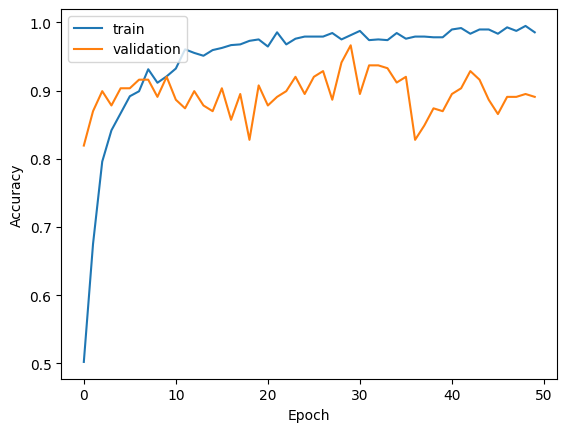

In [56]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

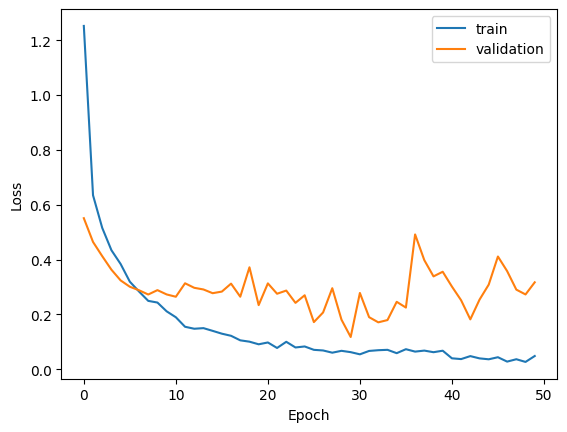

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [58]:
import time

# define directory for saved model
saved_model_dir = 'saved_models/' + str(int(time.time()))

# save trained model
tf.saved_model.save(model, saved_model_dir)


In [ ]:
!pip install coremltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 44.4 MB/s eta 0:00:00


In [ ]:
import coremltools as ct

# define input and output names for CoreML model
input_name = 'input_1'
output_name = 'dense_1'

# set input and output shapes for CoreML model
input_shape = (1, 299, 299, 3)
output_shape = (1, 2)

# convert saved model to CoreML model
coreml_model = ct.convert(saved_model_dir, inputs=[ct.ImageType(name=input_name, shape=input_shape)])

# save CoreML model to disk
coreml_model.save('MobileNetV2.mlmodel')

Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 491/491 [00:00<00:00, 1557.34 ops/s]
